In [1]:
from dwca.read import DwCAReader
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


with DwCAReader('mizip.zip') as dwca:
    print("Core data file is: {}".format(dwca.descriptor.core.file_location))
    core_df = dwca.pd_read('occurrence.txt', parse_dates=True)
    im_df =dwca.pd_read('multimedia.txt', parse_dates=True)

Core data file is: occurrence.txt


<ipython-input-1-b1c0a394494a>:9: DtypeWarning: Columns (2,9,26,35,39,42,46,47,54,56,57,58,59,60,62,64,65,66,68,69,70,73,74,75,76,78,80,81,82,83,84,85,86,87,88,92,93,94,95,97,99,103,104,105,106,107,108,110,111,112,113,115,116,117,118,119,121,122,123,124,125,126,127,128,129,130,131,133,136,137,138,139,141,142,143,144,145,146,147,148,149,150,152,153,154,155,156,157,158,159,160,161,162,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,183,184,185,186,187,188,189,196,200,201,202,204,205,211,212,213,214,217,218,219,220,224,225,226,227,228,233,237,239,240,241,242,243,244,245,246,247,248) have mixed types.Specify dtype option on import or set low_memory=False.
  core_df = dwca.pd_read('occurrence.txt', parse_dates=True)
<ipython-input-1-b1c0a394494a>:10: DtypeWarning: Columns (5,7,8,11) have mixed types.Specify dtype option on import or set low_memory=False.
  im_df =dwca.pd_read('multimedia.txt', parse_dates=True)


In [58]:
core_df.head()


,id,identifier,language,license,modified,publisher,references,rights,rightsHolder,institutionCode,...,lastParsed,lastCrawled,repatriated,level0Gid,level0Name,level1Gid,level1Name,level2Gid,level2Name,geodeticDatum
0,2438770494,ba3e440c-c9a1-4fc4-a94e-ebb1fbbb6ea9,NaN,CC_BY_4_0,NaN,Australia's Virtual Herbarium,https://biocache.ala.org.au/occurrences/ba3e44...,NaN,NaN,MEL,...,2021-06-06T22:13:32.706Z,2021-06-06T21:56:24.463Z,false,AUS,Australia,AUS.10_1,Victoria,AUS.10.62_1,South Gippsland,WGS84
1,2434842541,10574b5b-709a-45e9-b34b-cad2ae2ee357,NaN,CC_BY_4_0,NaN,Australia's Virtual Herbarium,https://biocache.ala.org.au/occurrences/10574b...,NaN,NaN,MEL,...,2021-06-06T22:13:15.870Z,2021-06-06T21:56:24.463Z,false,AUS,Australia,AUS.10_1,Victoria,AUS.10.79_1,Yarra Ranges,WGS84
2,2435361192,2b5603c8-16af-4fa8-99a2-f516f0d8a6ec,NaN,CC_BY_4_0,NaN,Australia's Virtual Herbarium,https://biocache.ala.org.au/occurrences/2b5603...,NaN,NaN,MEL,...,2021-06-06T22:13:18.560Z,2021-06-06T21:56:24.463Z,true,NaN,NaN,NaN,NaN,NaN,NaN,WGS84
3,2438837736,ab5c24c4-0472-4732-8b9a-c7fad90d6670,NaN,CC_BY_4_0,NaN,Australia's Virtual Herbarium,https://biocache.ala.org.au/occurrences/ab5c24...,NaN,NaN,MEL,...,2021-06-06T22:13:34.213Z,2021-06-06T21:56:24.463Z,false,AUS,Australia,AUS.11_1,Western Australia,AUS.11.44_1,Dundas,WGS84
4,2438565508,bf8455ca-2b5e-473b-9b18-f5cb1262a29a,NaN,CC_BY_4_0,NaN,Australia's Virtual Herbarium,https://biocache.ala.org.au/occurrences/bf8455...,NaN,NaN,MEL,...,2021-06-06T22:13:36.078Z,2021-06-06T21:56:24.463Z,false,AUS,Australia,AUS.10_1,Victoria,AUS.10.79_1,Yarra Ranges,WGS84


In [26]:
im_df.head()
im_df.columns
im_df.shape

(2505448, 10)

In [25]:
im_df.shape
im_df['coreid'].unique().shape

(1355838,)

In [20]:
core_df.shape

(1354629, 79)

In [6]:
core_df.isna().sum()

id                           0
abstract               1354629
accessRights           1300130
accrualMethod          1354629
accrualPeriodicity     1354629
                        ...   
level2Name              133539
level3Gid              1153953
level3Name             1189101
iucnRedListCategory    1288222
geodeticDatum                0
Length: 251, dtype: int64

In [8]:
core_df=core_df.loc[:, core_df.isnull().mean() < .8]

In [11]:
core_df.shape
1354629

(1354629, 79)

In [9]:
im_df=im_df.loc[:, im_df.isnull().mean() < .8]

In [10]:
im_df.shape

(2505448, 10)

In [61]:
merged_df=core_df.merge(right=im_df, how='inner',left_on='id',right_on='coreid')
merged_df.shape

(2503147, 25)

In [49]:
merged_df.head()

,id,identifier_x,language,license_x,modified,publisher_x,references_x,rights,rightsHolder_x,institutionCode,...,coreid,type,format,identifier_y,references_y,created,creator,publisher_y,license_y,rightsHolder_y
0,2438770494,ba3e440c-c9a1-4fc4-a94e-ebb1fbbb6ea9,NaN,CC_BY_4_0,NaN,Australia's Virtual Herbarium,https://biocache.ala.org.au/occurrences/ba3e44...,NaN,NaN,MEL,...,2438770494,StillImage,image/jpeg,https://images.ala.org.au/image/proxyImageThum...,https://images.ala.org.au/image/e8cbda8c-8c16-...,2020-06-06T12:55:56.554,Royal Botanic Gardens Victoria,NaN,http://creativecommons.org/licenses/by-nc-sa/4.0/,Royal Botanic Gardens Board
1,2438770494,ba3e440c-c9a1-4fc4-a94e-ebb1fbbb6ea9,NaN,CC_BY_4_0,NaN,Australia's Virtual Herbarium,https://biocache.ala.org.au/occurrences/ba3e44...,NaN,NaN,MEL,...,2438770494,StillImage,image/jpeg,https://images.ala.org.au/image/proxyImageThum...,https://images.ala.org.au/image/34e8d329-df42-...,2020-06-06T12:55:49.770,Royal Botanic Gardens Victoria,NaN,http://creativecommons.org/licenses/by-nc-sa/4.0/,Royal Botanic Gardens Board
2,2434842541,10574b5b-709a-45e9-b34b-cad2ae2ee357,NaN,CC_BY_4_0,NaN,Australia's Virtual Herbarium,https://biocache.ala.org.au/occurrences/10574b...,NaN,NaN,MEL,...,2434842541,StillImage,image/jpeg,https://images.ala.org.au/image/proxyImageThum...,https://images.ala.org.au/image/35be7c1e-85f6-...,2020-06-06T10:47:57.498,Royal Botanic Gardens Victoria,NaN,http://creativecommons.org/licenses/by-nc-sa/4.0/,Royal Botanic Gardens Board
3,2435361192,2b5603c8-16af-4fa8-99a2-f516f0d8a6ec,NaN,CC_BY_4_0,NaN,Australia's Virtual Herbarium,https://biocache.ala.org.au/occurrences/2b5603...,NaN,NaN,MEL,...,2435361192,StillImage,image/jpeg,https://images.ala.org.au/image/proxyImageThum...,https://images.ala.org.au/image/7b9cec27-862c-...,2020-06-06T09:42:51.401,Royal Botanic Gardens Victoria,NaN,http://creativecommons.org/licenses/by-nc-sa/4.0/,Royal Botanic Gardens Board
4,2438837736,ab5c24c4-0472-4732-8b9a-c7fad90d6670,NaN,CC_BY_4_0,NaN,Australia's Virtual Herbarium,https://biocache.ala.org.au/occurrences/ab5c24...,NaN,NaN,MEL,...,2438837736,StillImage,image/jpeg,https://images.ala.org.au/image/proxyImageThum...,https://images.ala.org.au/image/efbdb5af-79b2-...,2020-06-04T18:07:15.442,Royal Botanic Gardens Victoria,NaN,http://creativecommons.org/licenses/by-nc-sa/4.0/,Royal Botanic Gardens Board


In [50]:
im_df['coreid'].value_counts()

2883121345    69
1838349647    62
3314449316    48
2883137351    43
3097147110    39
              ..
1929816147     1
1929816312     1
1929816407     1
1929816567     1
3340176472     1
Name: coreid, Length: 1355838, dtype: int64

In [51]:
im_df[im_df['coreid']==2883121345]['references']

1380303    https://www.inaturalist.org/photos/57843160
1380304    https://www.inaturalist.org/photos/57843242
1380305    https://www.inaturalist.org/photos/57843175
1380306    https://www.inaturalist.org/photos/57843193
1380307    https://www.inaturalist.org/photos/57843200
                              ...                     
1380367    https://www.inaturalist.org/photos/57843213
1380368    https://www.inaturalist.org/photos/57843150
1380369    https://www.inaturalist.org/photos/57843212
1380370    https://www.inaturalist.org/photos/57843253
1380371    https://www.inaturalist.org/photos/57843142
Name: references, Length: 69, dtype: object

In [52]:
merged_df['id'].unique().shape

(1354629,)

In [64]:
merged_df.to_csv('merged_bast.csv')

In [56]:
core_df.columns

Index(['id', 'identifier', 'language', 'license', 'modified', 'publisher',
       'references', 'rights', 'rightsHolder', 'institutionCode',
       'collectionCode', 'datasetName', 'basisOfRecord', 'occurrenceID',
       'catalogNumber', 'recordedBy', 'occurrenceStatus', 'eventDate',
       'eventTime', 'year', 'month', 'day', 'verbatimEventDate', 'habitat',
       'locationID', 'continent', 'countryCode', 'stateProvince', 'locality',
       'verbatimLocality', 'decimalLatitude', 'decimalLongitude',
       'coordinateUncertaintyInMeters', 'identificationID', 'identifiedBy',
       'dateIdentified', 'taxonID', 'acceptedNameUsageID', 'scientificName',
       'kingdom', 'phylum', 'class', 'order', 'family', 'genus',
       'specificEpithet', 'taxonRank', 'taxonomicStatus', 'datasetKey',
       'publishingCountry', 'lastInterpreted', 'issue', 'mediaType',
       'hasCoordinate', 'hasGeospatialIssues', 'taxonKey', 'acceptedTaxonKey',
       'kingdomKey', 'phylumKey', 'classKey', 'orderKey',

In [59]:
core_df=core_df[['id','identifier','kingdom','phylum','class','order','family','genus','species','verbatimScientificName','countryCode','stateProvince','decimalLatitude','decimalLongitude','hasCoordinate']]

In [60]:
core_df.head()

,id,identifier,kingdom,phylum,class,order,family,genus,species,verbatimScientificName,countryCode,stateProvince,decimalLatitude,decimalLongitude,hasCoordinate
0,2438770494,ba3e440c-c9a1-4fc4-a94e-ebb1fbbb6ea9,Fungi,Basidiomycota,Agaricomycetes,Agaricales,Hygrophoraceae,Hygrocybe,Hygrocybe hypospoda,Hygrocybe hypospoda,AU,Victoria,-39.020600,146.3361,True
1,2434842541,10574b5b-709a-45e9-b34b-cad2ae2ee357,Fungi,Basidiomycota,Agaricomycetes,Agaricales,Mycenaceae,Mycena,Mycena mulawaestris,Mycena mulawaestris,AU,Victoria,-37.666667,145.733333,True
2,2435361192,2b5603c8-16af-4fa8-99a2-f516f0d8a6ec,Fungi,Basidiomycota,Agaricomycetes,Russulales,Bondarzewiaceae,Amylosporus,Amylosporus campbellii,Amylosporus campbellii,MM,NaN,NaN,NaN,False
3,2438837736,ab5c24c4-0472-4732-8b9a-c7fad90d6670,Fungi,Basidiomycota,Agaricomycetes,Agaricales,Agaricaceae,Barcheria,Barcheria willisiana,Barcheria willisiana,AU,Western Australia,-32.176100,121.3997,True
4,2438565508,bf8455ca-2b5e-473b-9b18-f5cb1262a29a,Fungi,Basidiomycota,Agaricomycetes,Gomphales,Clavariadelphaceae,Beenakia,Beenakia dacostae,Beenakia dacostae,AU,Victoria,-37.850000,145.7,True


In [65]:
merged_df.head()

,id,identifier_x,kingdom,phylum,class,order,family,genus,species,verbatimScientificName,...,coreid,type,format,identifier_y,references,created,creator,publisher,license,rightsHolder
0,2438770494,ba3e440c-c9a1-4fc4-a94e-ebb1fbbb6ea9,Fungi,Basidiomycota,Agaricomycetes,Agaricales,Hygrophoraceae,Hygrocybe,Hygrocybe hypospoda,Hygrocybe hypospoda,...,2438770494,StillImage,image/jpeg,https://images.ala.org.au/image/proxyImageThum...,https://images.ala.org.au/image/e8cbda8c-8c16-...,2020-06-06T12:55:56.554,Royal Botanic Gardens Victoria,NaN,http://creativecommons.org/licenses/by-nc-sa/4.0/,Royal Botanic Gardens Board
1,2438770494,ba3e440c-c9a1-4fc4-a94e-ebb1fbbb6ea9,Fungi,Basidiomycota,Agaricomycetes,Agaricales,Hygrophoraceae,Hygrocybe,Hygrocybe hypospoda,Hygrocybe hypospoda,...,2438770494,StillImage,image/jpeg,https://images.ala.org.au/image/proxyImageThum...,https://images.ala.org.au/image/34e8d329-df42-...,2020-06-06T12:55:49.770,Royal Botanic Gardens Victoria,NaN,http://creativecommons.org/licenses/by-nc-sa/4.0/,Royal Botanic Gardens Board
2,2434842541,10574b5b-709a-45e9-b34b-cad2ae2ee357,Fungi,Basidiomycota,Agaricomycetes,Agaricales,Mycenaceae,Mycena,Mycena mulawaestris,Mycena mulawaestris,...,2434842541,StillImage,image/jpeg,https://images.ala.org.au/image/proxyImageThum...,https://images.ala.org.au/image/35be7c1e-85f6-...,2020-06-06T10:47:57.498,Royal Botanic Gardens Victoria,NaN,http://creativecommons.org/licenses/by-nc-sa/4.0/,Royal Botanic Gardens Board
3,2435361192,2b5603c8-16af-4fa8-99a2-f516f0d8a6ec,Fungi,Basidiomycota,Agaricomycetes,Russulales,Bondarzewiaceae,Amylosporus,Amylosporus campbellii,Amylosporus campbellii,...,2435361192,StillImage,image/jpeg,https://images.ala.org.au/image/proxyImageThum...,https://images.ala.org.au/image/7b9cec27-862c-...,2020-06-06T09:42:51.401,Royal Botanic Gardens Victoria,NaN,http://creativecommons.org/licenses/by-nc-sa/4.0/,Royal Botanic Gardens Board
4,2438837736,ab5c24c4-0472-4732-8b9a-c7fad90d6670,Fungi,Basidiomycota,Agaricomycetes,Agaricales,Agaricaceae,Barcheria,Barcheria willisiana,Barcheria willisiana,...,2438837736,StillImage,image/jpeg,https://images.ala.org.au/image/proxyImageThum...,https://images.ala.org.au/image/efbdb5af-79b2-...,2020-06-04T18:07:15.442,Royal Botanic Gardens Victoria,NaN,http://creativecommons.org/licenses/by-nc-sa/4.0/,Royal Botanic Gardens Board


In [67]:
merged_df['references'].unique().shape

(1218288,)

In [69]:
merged_df['identifier_y'].unique().shape

(2501659,)

In [70]:
merged_df.shape

(2503147, 25)

In [72]:
merged_df.isna().sum()

id                              0
identifier_x                 1854
kingdom                        21
phylum                         21
class                          23
order                         959
family                      36431
genus                       19359
species                    136539
verbatimScientificName         44
countryCode                 17320
stateProvince              475199
decimalLatitude            162418
decimalLongitude           162415
hasCoordinate                  25
coreid                          0
type                         2335
format                      30194
identifier_y                  113
references                1281948
created                   1312838
creator                    470406
publisher                 1313105
license                    493760
rightsHolder               226852
dtype: int64

In [74]:
merged_df=merged_df.dropna(subset=['identifier_y'])

In [75]:
merged_df.isna().sum()

id                              0
identifier_x                 1854
kingdom                        21
phylum                         21
class                          23
order                         959
family                      36408
genus                       19336
species                    136509
verbatimScientificName         44
countryCode                 17320
stateProvince              475190
decimalLatitude            162392
decimalLongitude           162389
hasCoordinate                  25
coreid                          0
type                         2246
format                      30105
identifier_y                    0
references                1281948
created                   1312725
creator                    470293
publisher                 1312992
license                    493674
rightsHolder               226742
dtype: int64

In [77]:
merged_df=merged_df.drop_duplicates(subset=['identifier_y'])

In [87]:
merged_df['kingdom'].value_counts()

Fungi                       2501631
7451024                           3
CA                                1
2549396                           1
2021-05-14T17:10:14.389Z          1
Name: kingdom, dtype: int64

In [93]:

for j in['kingdom','phylum','class','order','family',"genus","species"]:
    print(j,':','\n',merged_df[j].value_counts(),'\n')

kingdom : 
 Fungi                       2501631
7451024                           3
CA                                1
2549396                           1
2021-05-14T17:10:14.389Z          1
Name: kingdom, dtype: int64 

phylum : 
 Basidiomycota               2501631
Funalia floccosa                  3
2021-06-30T22:07:16.674Z          1
Earliella scabrosa                1
1371.0                            1
Name: phylum, dtype: int64 

class : 
 Agaricomycetes    2501631
Coriolopsis             3
Earliella               1
Name: class, dtype: int64 

order : 
 Agaricales                                      1276012
Polyporales                                      488135
Russulales                                       220012
Boletales                                        191172
Hymenochaetales                                   89935
Auriculariales                                    49501
Cantharellales                                    49234
Phallales                               

C:\Users\baugn\anaconda3\envs\tf-gpu\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 138 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\baugn\anaconda3\envs\tf-gpu\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 138 missing from current font.
  font.set_text(s, 0, flags=flags)


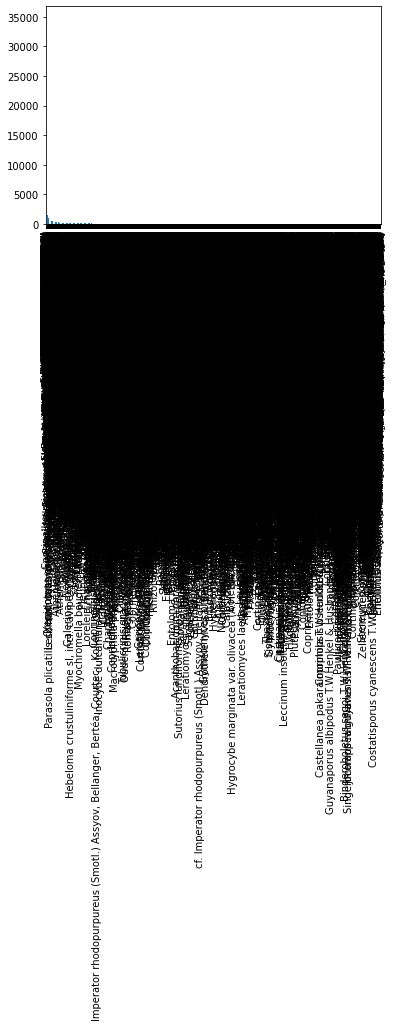

In [100]:
merged_df['verbatimScientificName'].value_counts().plot.bar();

In [109]:
A=merged_df['verbatimScientificName'].value_counts()

In [113]:
A.shape

(48972,)

In [114]:
import numpy as np
x=np.arange(48972)
A.index=x

In [107]:
x

array([    0,     1,     2, ..., 31808, 31809, 31810])

In [115]:
A

0        35055
1        31811
2        23586
3        20419
4        20408
         ...  
48967        1
48968        1
48969        1
48970        1
48971        1
Name: verbatimScientificName, Length: 48972, dtype: int64

(0.0, 100.0)

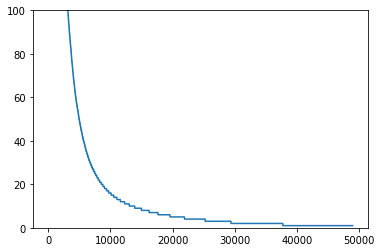

In [123]:

A.plot.line()
plt.ylim((0,100))


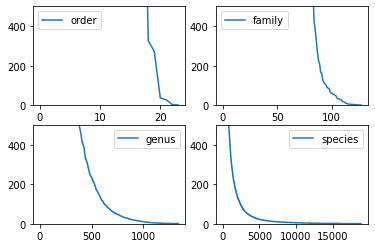

In [147]:
Graph=['order','family','genus','species']

    
plt.subplot(221)
A=merged_df['order'].value_counts()
plt.plot(np.arange(A.shape[0]), A,label='order')
plt.ylim((0,500))
plt.legend()
plt.subplot(222)
A=merged_df['family'].value_counts()
plt.plot(np.arange(A.shape[0]), A,label='family')
plt.ylim((0,500))
plt.legend()
plt.subplot(223)
A=merged_df['genus'].value_counts()
plt.plot(np.arange(A.shape[0]), A,label='genus')
plt.ylim((0,500))
plt.legend() 
plt.subplot(224)
A=merged_df['species'].value_counts()
plt.plot(np.arange(A.shape[0]), A,label='species')
plt.ylim((0,500))
plt.legend();

In [128]:
merged_df.shape

(2501658, 25)

In [130]:
for i,j in enumerate(Graph):
    print(i,j)

0 order
1 family
2 genus
3 species


In [148]:
merged_df.to_csv('merged_bast.csv')